In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
pd.options.display.float_format = '{:,.2f}'.format
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import statsmodels.api as sm

C:\Users\Richard\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


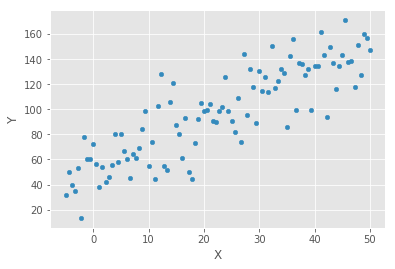

In [2]:
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x  + np.random.normal(0, 20, size=len(x))
data = pd.DataFrame({'X': x, 'Y': y})
ax = data.plot.scatter(x='X', y='Y');

Our linear model with a single independent variable on the left-hand side assumes the following form:

$$y = \beta_0 + \beta_1 X_1 + \epsilon$$

$\epsilon$ accounts for the errors that we will encounter as our data do not actually fit a straight line. When $\epsilon$ materializes, that is when we run the model of this type on actual data, the errors are called **residuals**.

In [7]:
# X = sm.add_constant(data['X'])
# adds a constant, eg 1's to the data matrix 
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     274.3
Date:                Wed, 09 Aug 2017   Prob (F-statistic):           3.68e-30
Time:                        18:45:16   Log-Likelihood:                -435.51
No. Observations:                 100   AIC:                             875.0
Df Residuals:                      98   BIC:                             880.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         53.0505      3.279     16.177      0.000      46.543      59.558
X              1.9658      0.119     16.562      0.000       1.730       2.201
==============================================================================
Omnibus:                        0.064   Durbin-Watson:                   2.135
Prob(Omnibus):                  0.969   Jarque-Bera (JB):                0.047
Skew:                          -0.042   Prob(JB):                        0.977
Kurtosis:                       2.935   Cond. No.                         47.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

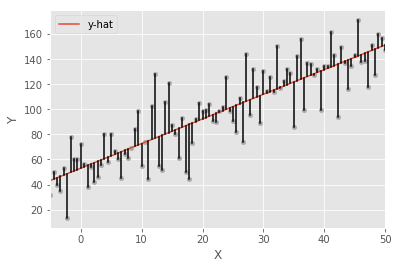

In [6]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid
ax = data.plot.scatter(x='X', y='Y', c='darkgrey')
data.plot.line(x='X', y='y-hat', ax=ax);
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')    

For two independent variables, the model simply changes as follows:

$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$$

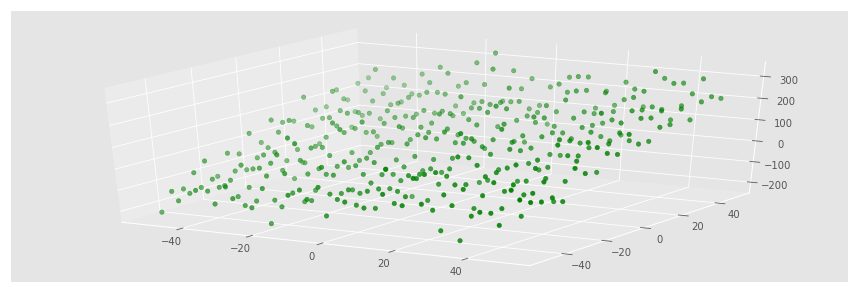

In [8]:
## Create data
size = 20
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')
data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)

## Plot
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g');

In [9]:
X = sm.add_constant(data[['X_1', 'X_2']])
model = sm.OLS(data['Y'], X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     797.5
Date:                Wed, 09 Aug 2017   Prob (F-statistic):          9.00e-140
Time:                        18:47:11   Log-Likelihood:                -2119.9
No. Observations:                 400   AIC:                             4246.
Df Residuals:                     397   BIC:                             4258.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.7573      2.432     21.279      0.000      46.975      56.539
X_1            0.9383      0.080     11.707      0.000       0.781       1.096
X_2            3.0601      0.080     38.182      0.000       2.903       3.218
==============================================================================
Omnibus:                        4.529   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                5.028
Skew:                           0.132   Prob(JB):                       0.0810
Kurtosis:                       3.482   Cond. No.                         30.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

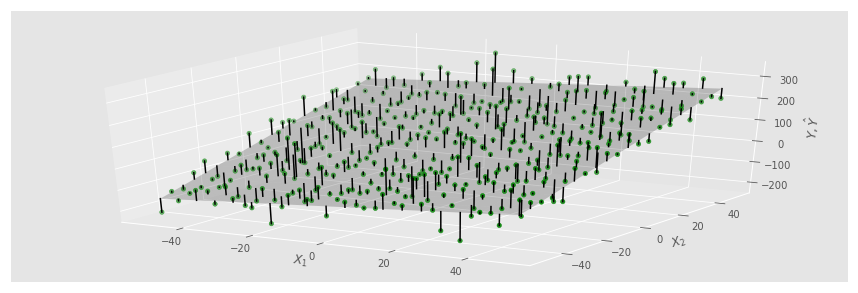

In [10]:
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
data['y-hat'] = model.predict()
to_plot = data.set_index(['X_1', 'X_2']).unstack().loc[:, 'y-hat']
three_dee.plot_surface(X_1, X_2, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
for _, row in data.iterrows():
    plt.plot((row.X_1, row.X_1), (row.X_2, row.X_2), (row.Y, row['y-hat']), 'k-');
three_dee.set_xlabel('$X_1$');three_dee.set_ylabel('$X_2$');three_dee.set_zlabel('$Y, \hat{Y}$');